# Solving probability problems using simulation and randomization

Question: If you randomly select a card from a well-shuffled standard 52-card deck, what is the probability that the card you select is a club (♣) or a **7**?

Of course we can easily solve this problem using probability theory for the random process of choosing a card from a 52-card deck. Let $C$ be the event of drawing a club (♣) and $S$ the event of drawing a **7**. There are 13 clubs, so the number of outcomes $|C|$ in $C$ is 13: $|C|=13.$ There are four **7**'s, thus the number of outcomes in $S$, $|S|$ is 4: $|S|=4.$ There is also a club that is a 7, the **7** of clubs (**7♣**), so $|C\cap S|=1.$ The (theoretical) probability of the event $C \cup S$ is given by the *addition rule:* $P(C \cup S) = P(C) + P(S) - P(C \cap S) = \frac{13}{52}+\frac{4}{52}-\frac{1}{52}=\frac{16}{52}=\frac{4}{13}\approx 0.31$


In [1]:
%precision 2 
13/52 + 4/52 - 1/52
# About line 1: This is an python 'magic' function. Read more about these here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html

0.31

Thus about 31% of the time we will observe a club or a **7**.

We could also have approached the problem empirically by shuffling a real deck of cards and drawing one card at random and observing how many times we observe a **7** or a club after replicating the experiment a large number of times. Of course, actually doing this would take more time that we would like to invest. Instead, we run a *simulation* using the computer.

In [2]:
# Let us build a deck to draw cards from
import numpy as np
rank=np.array([2,3,4,5,6,7,8,9,10,'J','Q','K','A'])
suits= list('♥♦♣♠')
deck=[(i,j) for i in rank for j in suits]
deck

[('2', '♥'),
 ('2', '♦'),
 ('2', '♣'),
 ('2', '♠'),
 ('3', '♥'),
 ('3', '♦'),
 ('3', '♣'),
 ('3', '♠'),
 ('4', '♥'),
 ('4', '♦'),
 ('4', '♣'),
 ('4', '♠'),
 ('5', '♥'),
 ('5', '♦'),
 ('5', '♣'),
 ('5', '♠'),
 ('6', '♥'),
 ('6', '♦'),
 ('6', '♣'),
 ('6', '♠'),
 ('7', '♥'),
 ('7', '♦'),
 ('7', '♣'),
 ('7', '♠'),
 ('8', '♥'),
 ('8', '♦'),
 ('8', '♣'),
 ('8', '♠'),
 ('9', '♥'),
 ('9', '♦'),
 ('9', '♣'),
 ('9', '♠'),
 ('10', '♥'),
 ('10', '♦'),
 ('10', '♣'),
 ('10', '♠'),
 ('J', '♥'),
 ('J', '♦'),
 ('J', '♣'),
 ('J', '♠'),
 ('Q', '♥'),
 ('Q', '♦'),
 ('Q', '♣'),
 ('Q', '♠'),
 ('K', '♥'),
 ('K', '♦'),
 ('K', '♣'),
 ('K', '♠'),
 ('A', '♥'),
 ('A', '♦'),
 ('A', '♣'),
 ('A', '♠')]

In [3]:
# As you can see we have created a deck using tuples. Note that the first 
# component (the 'rank' of the card) of the tuples is a string.
# We could suffle the deck in a number of ways. Here is one:
# First generate a permutation of the integers 0-51
perm = np.random.permutation(52)

# Using python's zip function we can now pair each card with a unique member of 
# perm.
def shuffle(deck: 'the deck'):
    deck_shuffled=zip(deck,list(np.random.permutation(52)))
    deck_shuffled=[i[0] for i in sorted(list(deck_shuffled), 
                                        key = lambda i:i[-1] )] 
                                        # What is the construct that I am using here? 
    return deck_shuffled

shuffle(deck)

[('Q', '♥'),
 ('10', '♣'),
 ('5', '♠'),
 ('7', '♠'),
 ('2', '♦'),
 ('K', '♣'),
 ('4', '♣'),
 ('K', '♦'),
 ('7', '♣'),
 ('4', '♦'),
 ('10', '♥'),
 ('Q', '♦'),
 ('8', '♣'),
 ('5', '♥'),
 ('4', '♥'),
 ('K', '♠'),
 ('8', '♠'),
 ('9', '♦'),
 ('8', '♥'),
 ('3', '♣'),
 ('2', '♠'),
 ('J', '♥'),
 ('K', '♥'),
 ('J', '♣'),
 ('8', '♦'),
 ('Q', '♣'),
 ('2', '♣'),
 ('5', '♣'),
 ('7', '♥'),
 ('3', '♦'),
 ('A', '♦'),
 ('J', '♠'),
 ('4', '♠'),
 ('10', '♦'),
 ('9', '♥'),
 ('3', '♥'),
 ('A', '♣'),
 ('2', '♥'),
 ('10', '♠'),
 ('6', '♣'),
 ('6', '♥'),
 ('7', '♦'),
 ('9', '♣'),
 ('A', '♠'),
 ('5', '♦'),
 ('9', '♠'),
 ('6', '♠'),
 ('J', '♦'),
 ('Q', '♠'),
 ('3', '♠'),
 ('A', '♥'),
 ('6', '♦')]

In [4]:
#construct used was the asecnding value of the digit generated by np.permutation(0, 1, 2, 3.... etc)

## Creativity Excercise
Come up with your own way (data structure) of producing a virtual deck of cards and a way (function) for shuffling the deck using code. Hint: Consider creating a [`class`](https://runestone.academy/runestone/books/published/fopp/Classes/toctree.html) for the cards. Also, consider looking at the [`numpy.random` library](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) or the [`random` module in Python](https://docs.python.org/3/library/random.html).  (Avoid looking up a full solution on the internet.)

In [5]:
import random

In [6]:
class Deck:
    def __init__(self):
        self.cards = []
    
    def hand(self):
        rank=np.array([2,3,4,5,6,7,8,9,10,'J','Q','K','A'])
        suits= list('♥♦♣♠')
        for i in rank:
            for j in suits:
                self.cards.append((i,j))
        return self.cards

    def shuffle(self):
        random.shuffle(self.cards)

    def show(self):
        return self.cards
    
    def __str__(self):
        return 'Your deck: \n {}'.format(self.cards)

With a shuffled deck we can draw a card and record whether we observe a **7** or a club.

In [7]:
rank, suit = shuffle(deck)[0]
(rank,suit)

('2', '♣')

In [8]:
def simulate(deck,reps,target):
    '''Randomly draw a card from deck reps times and record how many times
    the target card occurred. Then report its probability.'''
    count=0
    outcomes=[] # Optional: for looking at the outcomes for small reps, 500 say
    for i in np.random.randint(0,52,size=reps):
        flag = False
        rank, suit = deck[i]
        if rank == target[0] or suit == target[1]:
            count += 1
            flag = True
        # visualize outcomes for small reps    
        if reps < 500:
            outcomes.append("".join([rank,suit,'*'])) if flag else outcomes.append("".join([rank,suit]))
    if reps < 500: print(" ".join(outcomes))
    print('successes:', count)
    print('trials:', reps)
    print('Observed probability of',target[0],'or',target[1],f'is {count/reps:.2f}')
    return count/reps        

In [9]:
# Repeat 10 times: We sample (at random) from the deck and note whether a 7 or 
# ♣ occured. These are the 'successes'.
simulate(deck,10,('7','♣'))

3♣* J♠ 5♠ A♦ J♥ 3♥ Q♣* A♥ 3♦ 2♦
successes: 2
trials: 10
Observed probability of 7 or ♣ is 0.20


0.20

In [10]:
# Repeat 49 times
simulate(deck,49,('7','♣'))

4♥ A♣* A♦ 9♦ 4♥ 3♣* 10♣* 4♠ 2♦ Q♦ 5♣* A♠ 4♠ 3♣* 7♥* 3♥ 7♥* K♦ 2♥ A♥ 8♣* A♦ 6♣* 4♥ 9♠ 7♠* 2♠ 8♠ K♦ J♠ K♠ 2♣* 10♣* 4♦ 5♣* 9♦ 10♥ 3♣* 5♣* 7♣* A♦ 4♦ 7♦* 9♥ 9♥ J♣* 7♦* 4♠ 6♥
successes: 19
trials: 49
Observed probability of 7 or ♣ is 0.39


0.39

In [11]:
# Sample 10000 times; repeat 10 times
for i in range(10):
    simulate(deck,10000,('7','♣'))
    print('')

successes: 3139
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3015
trials: 10000
Observed probability of 7 or ♣ is 0.30

successes: 3111
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3137
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3075
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3059
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3117
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3109
trials: 10000
Observed probability of 7 or ♣ is 0.31

successes: 3030
trials: 10000
Observed probability of 7 or ♣ is 0.30

successes: 3070
trials: 10000
Observed probability of 7 or ♣ is 0.31



## Problem 1: Probability distribution
Using our virtual deck from above, consider the random process of shuffling the ordered subset $S=${` ('J', '♠')`, `('Q', '♠')`, `('K', '♠')`, `('A', '♠')`}. 
<figure>
<center>
<img src='https://drive.google.com/uc?id=1EfI46auM298nnajTA0cWZp0QnRqB9m4e'/>
<figcaption>Figure 1. The subset $S$ and its reference ordering.</figcaption></center>
</figure>

Let $\mathfrak{P}(S)$ be the set of all permutations of the elements of $S.$

Now choose a permutation of $S$ from $\mathfrak{P}(S)$, and observe the number of cards fixed by the permutation. Denote the set of all these possible results by $F.$





a) How many permutations are there in $\mathfrak{P}(S)?$
* Obtain this result using a counting technique and with code by producing a listing of all permutations in $\mathfrak{P}(S).$
    



In [12]:
import itertools
BS = list(itertools.permutations([('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')]))
print(BS,'\n' ,len(BS))

[(('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')), (('J', '♠'), ('Q', '♠'), ('A', '♠'), ('K', '♠')), (('J', '♠'), ('K', '♠'), ('Q', '♠'), ('A', '♠')), (('J', '♠'), ('K', '♠'), ('A', '♠'), ('Q', '♠')), (('J', '♠'), ('A', '♠'), ('Q', '♠'), ('K', '♠')), (('J', '♠'), ('A', '♠'), ('K', '♠'), ('Q', '♠')), (('Q', '♠'), ('J', '♠'), ('K', '♠'), ('A', '♠')), (('Q', '♠'), ('J', '♠'), ('A', '♠'), ('K', '♠')), (('Q', '♠'), ('K', '♠'), ('J', '♠'), ('A', '♠')), (('Q', '♠'), ('K', '♠'), ('A', '♠'), ('J', '♠')), (('Q', '♠'), ('A', '♠'), ('J', '♠'), ('K', '♠')), (('Q', '♠'), ('A', '♠'), ('K', '♠'), ('J', '♠')), (('K', '♠'), ('J', '♠'), ('Q', '♠'), ('A', '♠')), (('K', '♠'), ('J', '♠'), ('A', '♠'), ('Q', '♠')), (('K', '♠'), ('Q', '♠'), ('J', '♠'), ('A', '♠')), (('K', '♠'), ('Q', '♠'), ('A', '♠'), ('J', '♠')), (('K', '♠'), ('A', '♠'), ('J', '♠'), ('Q', '♠')), (('K', '♠'), ('A', '♠'), ('Q', '♠'), ('J', '♠')), (('A', '♠'), ('J', '♠'), ('Q', '♠'), ('K', '♠')), (('A', '♠'), ('J', '♠'), ('K', '♠'), ('Q', '♠')),

b) Again using code, tabulate the number of cards fixed for each permutation of $S.$
* Explicitly list the elements of $F.$ How many unique results do you observe? This is the size of $F.$
* Can a permutation fix exactly three cards? Explain.
* Produce a relative frequency distribution for these data and produce a histogram. This is called a *probability distribution* for the *random variable* that counts the number of cards fixed by a permutation of the set $S.$

In [13]:
S = [('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')]
F = []

In [14]:
for perm in BS:
    for card in range(0,4):
        if perm[card] == S[card]:
            F.append(perm)
            break

In [15]:
F

[(('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')),
 (('J', '♠'), ('Q', '♠'), ('A', '♠'), ('K', '♠')),
 (('J', '♠'), ('K', '♠'), ('Q', '♠'), ('A', '♠')),
 (('J', '♠'), ('K', '♠'), ('A', '♠'), ('Q', '♠')),
 (('J', '♠'), ('A', '♠'), ('Q', '♠'), ('K', '♠')),
 (('J', '♠'), ('A', '♠'), ('K', '♠'), ('Q', '♠')),
 (('Q', '♠'), ('J', '♠'), ('K', '♠'), ('A', '♠')),
 (('Q', '♠'), ('K', '♠'), ('J', '♠'), ('A', '♠')),
 (('Q', '♠'), ('A', '♠'), ('K', '♠'), ('J', '♠')),
 (('K', '♠'), ('J', '♠'), ('Q', '♠'), ('A', '♠')),
 (('K', '♠'), ('Q', '♠'), ('J', '♠'), ('A', '♠')),
 (('K', '♠'), ('Q', '♠'), ('A', '♠'), ('J', '♠')),
 (('A', '♠'), ('J', '♠'), ('K', '♠'), ('Q', '♠')),
 (('A', '♠'), ('Q', '♠'), ('J', '♠'), ('K', '♠')),
 (('A', '♠'), ('Q', '♠'), ('K', '♠'), ('J', '♠'))]

In [16]:
numbers = []

In [17]:
count = 0
for row in F:
    for i in range(0,4):
        if row[i] == S[i]:
            count += 1
    numbers.append(count)
    count = 0

In [18]:
for i in set(numbers):
    print(i)

1
2
4


In [19]:
unique_F = dict(zip(F, numbers))

In [20]:
unique_F

{(('J', '♠'), ('Q', '♠'), ('K', '♠'), ('A', '♠')): 4,
 (('J', '♠'), ('Q', '♠'), ('A', '♠'), ('K', '♠')): 2,
 (('J', '♠'), ('K', '♠'), ('Q', '♠'), ('A', '♠')): 2,
 (('J', '♠'), ('K', '♠'), ('A', '♠'), ('Q', '♠')): 1,
 (('J', '♠'), ('A', '♠'), ('Q', '♠'), ('K', '♠')): 1,
 (('J', '♠'), ('A', '♠'), ('K', '♠'), ('Q', '♠')): 2,
 (('Q', '♠'), ('J', '♠'), ('K', '♠'), ('A', '♠')): 2,
 (('Q', '♠'), ('K', '♠'), ('J', '♠'), ('A', '♠')): 1,
 (('Q', '♠'), ('A', '♠'), ('K', '♠'), ('J', '♠')): 1,
 (('K', '♠'), ('J', '♠'), ('Q', '♠'), ('A', '♠')): 1,
 (('K', '♠'), ('Q', '♠'), ('J', '♠'), ('A', '♠')): 2,
 (('K', '♠'), ('Q', '♠'), ('A', '♠'), ('J', '♠')): 1,
 (('A', '♠'), ('J', '♠'), ('K', '♠'), ('Q', '♠')): 1,
 (('A', '♠'), ('Q', '♠'), ('J', '♠'), ('K', '♠')): 1,
 (('A', '♠'), ('Q', '♠'), ('K', '♠'), ('J', '♠')): 2}

A permutation cannot fix exactly 3 cards. 

If 3 cards are in the same position, the last card won't have anywhere else to go.

Meaning that the first card would also have to stay in the same position. Meaning that the 4 cards will all stay in the same position.

In [21]:
numbers.count(4) #1
numbers.count(2) #6
numbers.count(1) #8
len(numbers) #15

15

In [22]:
from scipy.stats import rv_discrete

# list containing the outcomes in the sample space
x = [1, 2, 4]

# list containing the probabilities for each outcome
p = [numbers.count(1)/len(numbers), numbers.count(2)/len(numbers), numbers.count(4)/len(numbers)]

discvar = rv_discrete(values=(x,p))

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
hist_data = pd.DataFrame(data= {'Outcome' : x, 'Probabilities' : p})
hist_data

,Outcome,Probabilities
0,1,0.533333
1,2,0.400000
2,4,0.066667


<AxesSubplot:xlabel='Probabilities', ylabel='Count'>

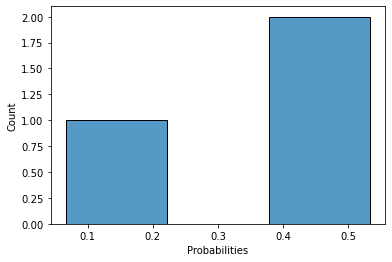

In [24]:
sns.histplot(data= hist_data['Probabilities'])

c) Repeat the analysis in part (b) using a simulation. Hints:
* Define the subset $S$ using the approach you created in the creativity excersice. Make the corresponding adjustments to the suffling function.
* Take sufficient samples (at least 10,000) and observe the number of cards fixed. Record the results.
* Compare your results to the theoretical ones from part (b).
* Produce an adequate visualization for your results.

In [25]:
class Deck2:
    def __init__(self):
        self.cards = []
        self.subset = []
    
    def hand(self):
        rank=np.array([2,3,4,5,6,7,8,9,10,'J','Q','K','A'])
        suits= list('♥♦♣♠')
        for i in rank:
            for j in suits:
                self.cards.append((i,j))
        return self.cards

    def shuffle(self):
        random.shuffle(self.cards)

    def show(self):
        return self.cards
    
    def subse(self, freq):
        """
        Freq -> how many cards you want in the subset
        """
        for i in range(0, freq):
            value = random.randint(1, 51)
            self.subset.append(self.cards[value])
        return self.subset
    
    def __str__(self):
        return 'Your deck: \n {}'.format(self.cards)

In [26]:
donnie = Deck2()

In [27]:
donnie.hand()

[('2', '♥'),
 ('2', '♦'),
 ('2', '♣'),
 ('2', '♠'),
 ('3', '♥'),
 ('3', '♦'),
 ('3', '♣'),
 ('3', '♠'),
 ('4', '♥'),
 ('4', '♦'),
 ('4', '♣'),
 ('4', '♠'),
 ('5', '♥'),
 ('5', '♦'),
 ('5', '♣'),
 ('5', '♠'),
 ('6', '♥'),
 ('6', '♦'),
 ('6', '♣'),
 ('6', '♠'),
 ('7', '♥'),
 ('7', '♦'),
 ('7', '♣'),
 ('7', '♠'),
 ('8', '♥'),
 ('8', '♦'),
 ('8', '♣'),
 ('8', '♠'),
 ('9', '♥'),
 ('9', '♦'),
 ('9', '♣'),
 ('9', '♠'),
 ('10', '♥'),
 ('10', '♦'),
 ('10', '♣'),
 ('10', '♠'),
 ('J', '♥'),
 ('J', '♦'),
 ('J', '♣'),
 ('J', '♠'),
 ('Q', '♥'),
 ('Q', '♦'),
 ('Q', '♣'),
 ('Q', '♠'),
 ('K', '♥'),
 ('K', '♦'),
 ('K', '♣'),
 ('K', '♠'),
 ('A', '♥'),
 ('A', '♦'),
 ('A', '♣'),
 ('A', '♠')]

In [28]:
donnie.shuffle()

In [29]:
tester = donnie.subse(freq= 10000)

In [30]:
def problem1c(subset):
    BS = list(itertools.permutations(subset))
    
    F = []
    numbers = []
    x = []
    p = []
    
    for perm in BS:
        for card in range(0,4):
            if perm[card] == subset[card]:
                F.append(perm)
                break
            
    count = 0
    for row in F:
        for i in range(0,4):
            if row[i] == S[i]:
                count += 1
        numbers.append(count)
        count = 0
        
    unique_F = dict(zip(F, numbers))
    
    for i in set(numbers):
        x.append(i)
        p.append(numbers.count(i)/len(numbers))
        
    hist_plot = pd.DataFrame(data= {'Outcome' : x, 'Probabilities' : p})
    
    return plt.hist(hist_plot['Probabilities'], density= True)

In [ ]:
problem1c(tester)

## Problem 2
Prove (using formal mathematics) that $P(T|D)=1-P(\overline{T}|D)$ for events $T$ and $D.$

*Proof*. Your proof goes here. $\square$

In [ ]:
# t is a list of odd numbers 1-50
# d is a list of multiples of 3 1-50
odd = [i for i in range(1, 51, 2)]
mul_3 = [x for x in range(3, 50, 3)]
total = len(odd) + len(mul_3)

$P(T|D) = \frac{P(T \cap D)}{P(D)}$

In [ ]:
t_cap_d = [x for x in odd if x in mul_3]

In [ ]:
# P(T|D)
t_given_d = ((len(t_cap_d))/total)/((len(mul_3))/total)
t_given_d

$P(\overline{T}|D) = \frac{P(\overline{T} \cap D)}{P(D)}$

In [ ]:
t_bar = [i for i in mul_3 if i%2 == 0]

In [ ]:
tbar_cap_d = [x for x in t_bar if x in mul_3]

In [ ]:
# P(T'|D)
tbar_given_d = ((len(tbar_cap_d))/total)/((len(mul_3))/total)

In [ ]:
1 - tbar_given_d

$P(T|D) = 0.5$

$1-P(\overline{T}|D) = 0.5$

$\therefore$ 
They are equal,
Q.E.D.